# Monte Carlo Simulation

Monte Carlo algorithm is a probabilistic (randomized) method. It is named after the famous Monte Carlo casino in Monaco due to its reliance on randomness, much like gambling. It is used to estimate possible outcomes of uncertain events.

In [1]:
#%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
#from matplotlib.animation import FuncAnimation
from collections import Counter

One of the simple yet interesting uses of Monte Carlo method is to estimate the probability of specific outcomes when rolling dice. This is a classic problem in probability theory that can sometimes turn out to be surprisingly tricky.

Imagine roling 5 dice at the same time. What is the probability that at least two of them show the same value?

**Analytical version**

First, let's perhaps solve this analytically. To calculate the probability that at least two dice show the same value, the easiest way is to use complementary probability. So, we calculate the probability of the opposite event, i.e. the one in which all the cubes are different. We subtract the opposite event from 1 (100%).

$|\Omega|$ - the total number of possible events

$|A|$ - the number of events in which all the values of the cubes are different

Each of the five cubes has 6 values, therefore:

$|\Omega| = 6^5 = 7776$

In order for each cube to have a different value, the first cube has 6 possibilities, the next has 5, and so on.

$|A| = 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 = 720 $

$P(A) = \frac{|A|}{|\Omega|}$

In [2]:
total_outcomes = 6**5
unique_outcomes = 6*5*4*3*2

prob_all_unique = unique_outcomes/total_outcomes

prob_at_least_one_pair = 1-prob_all_unique

print(f"Total number of results: {total_outcomes}")
print(f"Results with all different cubes: {unique_outcomes}")
print(f"P(all different) = {unique_outcomes}/{total_outcomes} = {prob_all_unique:.6f}")
print(f"P(at least one pair) = 1 - {prob_all_unique:.6f} = {prob_at_least_one_pair:.6f}")
print(f"Percentage: {prob_at_least_one_pair * 100:.2f}%")

Total number of results: 7776
Results with all different cubes: 720
P(all different) = 720/7776 = 0.092593
P(at least one pair) = 1 - 0.092593 = 0.907407
Percentage: 90.74%


It means that in about 9 out of 10 cases of throwing 5 dice, we will get at least one pair!

**Monte Carlo version**

Now let's get to the more interesting part. Let's calculate the same probability, but using a Monte Carlo simulation.

In [3]:
def simulate_dice_rolls(num_dice=5, num_simulations=100000):
    
    successes = 0  # counter for cases with at least one pair
    all_results = []
    
    for i in range(num_simulations):
        # roll all dice simultaneously
        roll = np.random.randint(1, 7, size=num_dice)
        
        # check for duplicates
        value_counts = Counter(roll)
        max_count = max(value_counts.values())
        
        # if any value appears more than once
        if max_count >= 2:
            successes += 1
            
        all_results.append(roll.copy())
    
    probability = successes / num_simulations
    return probability, all_results

# Run simulation
prob, results = simulate_dice_rolls(5, 100000)
print(f"Probability of at least one pair: {prob:.4f} ({prob*100:.2f}%)")

Probability of at least one pair: 0.9073 (90.73%)


As you can see, the probabilities are almost identical, using Monte Carlo simulation. With it, we calculated the probability of an event, without much thinking about how it should be done, which can sometimes cause more or less problems.

How does the number of dice affect pair probability?

2 dice: 0.1668 (16.68%)
3 dice: 0.4436 (44.36%)
4 dice: 0.7261 (72.61%)
5 dice: 0.9077 (90.77%)
6 dice: 0.9850 (98.50%)
7 dice: 1.0000 (100.00%)


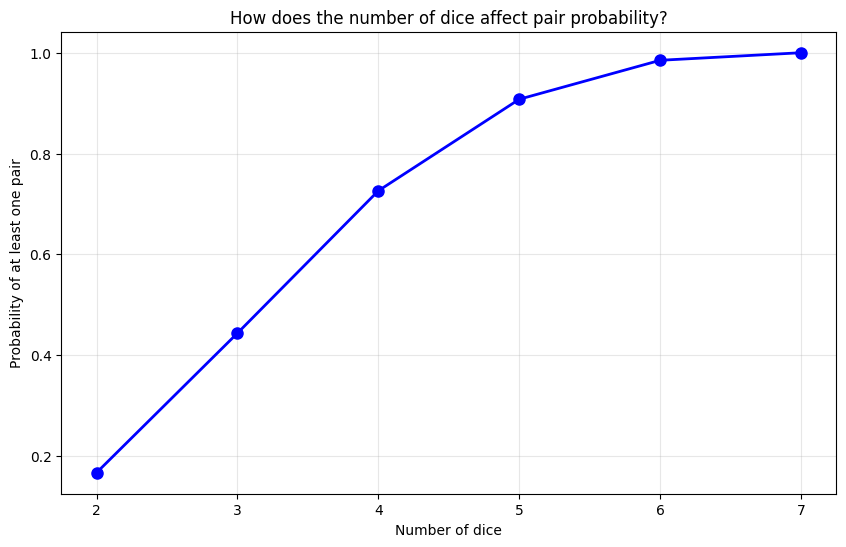

In [4]:
def multi_dice_analysis():
    
    dice_numbers = range(2, 8)
    probabilities = []
    
    for n_dice in dice_numbers:
        prob, _ = simulate_dice_rolls(n_dice, 50000)
        probabilities.append(prob)
        print(f"{n_dice} dice: {prob:.4f} ({prob*100:.2f}%)")
    
    plt.figure(figsize=(10, 6))
    plt.plot(dice_numbers, probabilities, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of dice')
    plt.ylabel('Probability of at least one pair')
    plt.title('How does the number of dice affect pair probability?')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return probabilities

probs = multi_dice_analysis()

From the graph above, you can see that the more cubes, the greater the chance of hitting two of the same value.

Of course, according to Dirichlet's box principle, if there are more cubes than values, then the same values must surely occur in 2 cubes, so the probability is 1 (100%).

Let's see how increasing the number of simulations affects the accuracy of the results.

n=  1000: MC=0.898000, Theory=0.907407, Error=0.009407
n=  5000: MC=0.909600, Theory=0.907407, Error=0.002193
n= 10000: MC=0.908900, Theory=0.907407, Error=0.001493
n= 50000: MC=0.908080, Theory=0.907407, Error=0.000673
n=100000: MC=0.909290, Theory=0.907407, Error=0.001883
n=1000000: MC=0.907951, Theory=0.907407, Error=0.000544


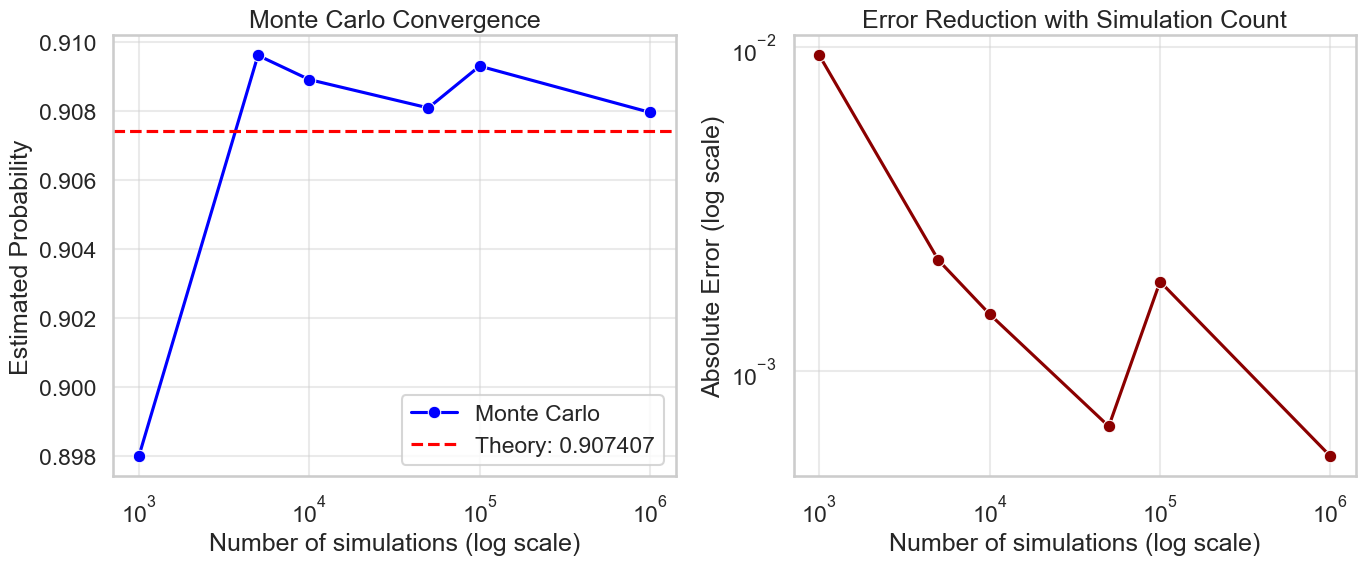

0.9074074074074074

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_with_theory():
    sns.set_theme(style="whitegrid", context="talk")

    # theoretical probability
    total_outcomes = 6**5
    unique_outcomes = 6*5*4*3*2
    prob_all_unique = unique_outcomes / total_outcomes
    theoretical_prob = 1 - prob_all_unique

    # Monte Carlo simulations
    simulation_counts = [1000, 5000, 10000, 50000, 100000, 1000000]
    mc_results = []

    for n_sim in simulation_counts:
        mc_prob, _ = simulate_dice_rolls(5, n_sim)
        mc_results.append(mc_prob)
        print(f"n={n_sim:6d}: MC={mc_prob:.6f}, Theory={theoretical_prob:.6f}, "
              f"Error={abs(mc_prob-theoretical_prob):.6f}")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Monte Carlo convergence
    sns.lineplot(x=simulation_counts, y=mc_results, marker='o', color='blue', ax=axes[0], label="Monte Carlo")
    axes[0].axhline(y=theoretical_prob, color='red', linestyle='--', label=f"Theory: {theoretical_prob:.6f}")
    axes[0].set_xscale('log')
    axes[0].set_xlabel('Number of simulations (log scale)')
    axes[0].set_ylabel('Estimated Probability')
    axes[0].set_title('Monte Carlo Convergence')
    axes[0].legend()
    axes[0].grid(True, alpha=0.4)

    # absolute error plot
    errors = [abs(mc - theoretical_prob) for mc in mc_results]
    sns.lineplot(x=simulation_counts, y=errors, marker='o', color='darkred', ax=axes[1])
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    axes[1].set_xlabel('Number of simulations (log scale)')
    axes[1].set_ylabel('Absolute Error (log scale)')
    axes[1].set_title('Error Reduction with Simulation Count')
    axes[1].grid(True, alpha=0.4)

    plt.tight_layout()
    plt.show()

    return theoretical_prob
compare_with_theory()

With Monte Carlo simulation, we can easily calculate the probability of all possible events.

In [6]:
def detailed_pair_analysis():

    num_simulations = 100000
    outcome_types = {
        'no_pairs': 0,
        'one_pair': 0,
        'two_pairs': 0,
        'three_of_kind': 0,
        'full_house': 0,  # pair + three of a kind
        'four_of_kind': 0,
        'five_of_kind': 0  # all values the same
    }
    
    for _ in range(num_simulations):
        roll = np.random.randint(1, 7, size=5)
        counter = Counter(roll)
        count_values = sorted(counter.values(), reverse=True)
        
        if count_values == [5]:
            outcome_types['five_of_kind'] += 1
        elif count_values == [4, 1]:
            outcome_types['four_of_kind'] += 1
        elif count_values == [3, 2]:
            outcome_types['full_house'] += 1
        elif count_values == [3, 1, 1]:
            outcome_types['three_of_kind'] += 1
        elif count_values == [2, 2, 1]:
            outcome_types['two_pairs'] += 1
        elif count_values == [2, 1, 1, 1]:
            outcome_types['one_pair'] += 1
        else:
            outcome_types['no_pairs'] += 1
    
    for key in outcome_types:
        outcome_types[key] = outcome_types[key] / num_simulations
    
    return outcome_types

detailed_results = detailed_pair_analysis()

for outcome_type, prob in detailed_results.items():
    print(f"{outcome_type.replace('_', ' ').title()}: {prob:.6f} ({prob*100:.4f}%)")


No Pairs: 0.093860 (9.3860%)
One Pair: 0.461720 (46.1720%)
Two Pairs: 0.231340 (23.1340%)
Three Of Kind: 0.154350 (15.4350%)
Full House: 0.038510 (3.8510%)
Four Of Kind: 0.019310 (1.9310%)
Five Of Kind: 0.000910 (0.0910%)
